Dependency
***

In [1627]:
import pandas as pd
import kaggle# to access kaggle
import pandas as pd
import scipy.stats as st
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np


import csv
import zipfile# importing dependence for zipfile
#from kaggle.api.kaggle_api_extended import KaggleApi #only use if using API(some code modificaton need)


For API if need(not running now)
***

In [1628]:
# this is for api use, but since data is already in resourse folder, this is not need.
#loading filess
# File to Load (Remember to Change These)
#api = KaggleApi()
#api.authenticate()
#downloading files
#api.dataset_download_file("umeradnaan/tourism-dataset",
 #                         file_name="tourism_dataset.csv")#path="./data 

#api.dataset_download_file("jessemostipak/hotel-booking-demand",
 #                         file_name="hotel_bookings.csv")


In [1629]:
#this is for api use, but since data is already in resourse folder, this is not need.
#unziping file
#with zipfile.ZipFile("hotel_bookings.csv.zip", "r") as zipref:
    #zipref.extractall()


Reading Files
***

In [1630]:
#reading files
hotel_data = Path("../Resources/hotel_bookings_dataset.csv")
travel_data = Path("../Resources/tourism_dataset.csv")
hotel_rating = Path("../Resources/hotel_ratings_bookings_APIdataset.csv")
hotel = pd.read_csv(hotel_data)
travel = pd.read_csv(travel_data)
rating =pd.read_csv(hotel_rating)
print(hotel.keys())
print(travel.keys())
print(rating.keys())


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')
Index(['Country Name', 'Average Rating', 'Booking Frequency'], dtype='object')


Removing files
***

In [1631]:
# Remove specified columns from the hotel_data DataFrame(code shared by Kathy Nguyen)
columns_to_remove = [
    'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
    'market_segment', 'distribution_channel', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type',
    'agent', 'company', 'days_in_waiting_list', 'customer_type',
    'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'lead_time', 'is_repeated_guest', 'previous_cancellations'
]

hotel = hotel.drop(columns=columns_to_remove)
hotel.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,adr,reservation_status
0,Resort Hotel,0,2015,July,0,0,2,0.0,0,PRT,0.0,Check-Out
1,Resort Hotel,0,2015,July,0,0,2,0.0,0,PRT,0.0,Check-Out
2,Resort Hotel,0,2015,July,0,1,1,0.0,0,GBR,75.0,Check-Out
3,Resort Hotel,0,2015,July,0,1,1,0.0,0,GBR,75.0,Check-Out
4,Resort Hotel,0,2015,July,0,2,2,0.0,0,GBR,98.0,Check-Out


Calculating stay

In [1632]:
#filtering out data for people that did not show up
hotel_clean= hotel.loc[(hotel["reservation_status"] != "Canceled"),:]
hotel_clean= hotel_clean.loc[(hotel_clean["reservation_status"] != "No-Show"),:]
hotel_clean.groupby("reservation_status").count()
hotel_clean

,hotel,is_canceled,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,adr,reservation_status
0,Resort Hotel,0,2015,July,0,0,2,0.0,0,PRT,0.00,Check-Out
1,Resort Hotel,0,2015,July,0,0,2,0.0,0,PRT,0.00,Check-Out
2,Resort Hotel,0,2015,July,0,1,1,0.0,0,GBR,75.00,Check-Out
3,Resort Hotel,0,2015,July,0,1,1,0.0,0,GBR,75.00,Check-Out
4,Resort Hotel,0,2015,July,0,2,2,0.0,0,GBR,98.00,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,2017,August,2,5,2,0.0,0,BEL,96.14,Check-Out
119386,City Hotel,0,2017,August,2,5,3,0.0,0,FRA,225.43,Check-Out
119387,City Hotel,0,2017,August,2,5,2,0.0,0,DEU,157.71,Check-Out
119388,City Hotel,0,2017,August,2,5,2,0.0,0,GBR,104.40,Check-Out


In [1633]:
# Combine 'stays_in_weekend_nights' and 'stays_in_week_nights' into a new column 'total_stays_days'(code shared by Kathy Nguyen)
hotel_clean['total_stays_days'] = hotel_clean['stays_in_weekend_nights'] + hotel_clean['stays_in_week_nights']
hotel_clean = hotel_clean.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'])
# Remove specified columns from the hotel_data DataFrame(code shared by Kathy Nguyen)
columns_to_remove = ["is_canceled"]
hotel_clean = hotel_clean.drop(columns=columns_to_remove)
# Display the updated hotel_data DataFrame
hotel_clean

,hotel,arrival_date_year,arrival_date_month,adults,children,babies,country,adr,reservation_status,total_stays_days
0,Resort Hotel,2015,July,2,0.0,0,PRT,0.00,Check-Out,0
1,Resort Hotel,2015,July,2,0.0,0,PRT,0.00,Check-Out,0
2,Resort Hotel,2015,July,1,0.0,0,GBR,75.00,Check-Out,1
3,Resort Hotel,2015,July,1,0.0,0,GBR,75.00,Check-Out,1
4,Resort Hotel,2015,July,2,0.0,0,GBR,98.00,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,2017,August,2,0.0,0,BEL,96.14,Check-Out,7
119386,City Hotel,2017,August,3,0.0,0,FRA,225.43,Check-Out,7
119387,City Hotel,2017,August,2,0.0,0,DEU,157.71,Check-Out,7
119388,City Hotel,2017,August,2,0.0,0,GBR,104.40,Check-Out,7


In [1634]:
#This is been commented out beause  I am assuming that visitor visited for a day any need a  place to rest for a small amount of ite.
#hotel_clean= hotel_clean.loc[(hotel_clean["total_stays_days"] > 0),:]

#hotel_clean
#len(hotel_clean["total_stays_days"])
#hotel_clean

# Updating the country names

In [1635]:
# Change country as CN to CHN as both of them are China
hotel_clean['country'] = hotel_clean['country'].replace('CN', 'CHN')
hotel_clean

,hotel,arrival_date_year,arrival_date_month,adults,children,babies,country,adr,reservation_status,total_stays_days
0,Resort Hotel,2015,July,2,0.0,0,PRT,0.00,Check-Out,0
1,Resort Hotel,2015,July,2,0.0,0,PRT,0.00,Check-Out,0
2,Resort Hotel,2015,July,1,0.0,0,GBR,75.00,Check-Out,1
3,Resort Hotel,2015,July,1,0.0,0,GBR,75.00,Check-Out,1
4,Resort Hotel,2015,July,2,0.0,0,GBR,98.00,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,2017,August,2,0.0,0,BEL,96.14,Check-Out,7
119386,City Hotel,2017,August,3,0.0,0,FRA,225.43,Check-Out,7
119387,City Hotel,2017,August,2,0.0,0,DEU,157.71,Check-Out,7
119388,City Hotel,2017,August,2,0.0,0,GBR,104.40,Check-Out,7


In [1636]:
#convert abbreviation to country name in the hotel_data dataframe(code shared by Kathy Nguyen)
country_mapping = {
    'PRT': 'Portugal',
    'GBR': 'United Kingdom',
    'USA': 'United States',
    'ESP': 'Spain',
    'IRL': 'Ireland',
    'FRA': 'France',
    'ROU': 'Romania',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'ARG': 'Argentina',
    'POL': 'Poland',
    'DEU': 'Germany',
    'BEL': 'Belgium',
    'CHE': 'Switzerland',
    'CN': 'China',
    'GRC': 'Greece',
    'ITA': 'Italy',
    'NLD': 'Netherlands',
    'DNK': 'Denmark',
    'RUS': 'Russia',
    'SWE': 'Sweden',
    'AUS': 'Australia',
    'EST': 'Estonia',
    'CZE': 'Czech Republic',
    'BRA': 'Brazil',
    'FIN': 'Finland',
    'MOZ': 'Mozambique',
    'BWA': 'Botswana',
    'LUX': 'Luxembourg',
    'SVN': 'Slovenia',
    'ALB': 'Albania',
    'IND': 'India',
    'CHN': 'China',
    'MEX': 'Mexico',
    'MAR': 'Morocco',
    'UKR': 'Ukraine',
    'SMR': 'San Marino',
    'LVA': 'Latvia',
    'PRI': 'Puerto Rico',
    'SRB': 'Serbia',
    'CHL': 'Chile',
    'AUT': 'Austria',
    'BLR': 'Belarus',
    'LTU': 'Lithuania',
    'TUR': 'Turkey',
    'ZAF': 'South Africa',
    'AGO': 'Angola',
    'ISR': 'Israel',
    'CYM': 'Cayman Islands',
    'ZMB': 'Zambia',
    'CPV': 'Cape Verde',
    'ZWE': 'Zimbabwe',
    'DZA': 'Algeria',
    'KOR': 'South Korea',
    'CRI': 'Costa Rica',
    'HUN': 'Hungary',
    'ARE': 'United Arab Emirates',
    'TUN': 'Tunisia',
    'JAM': 'Jamaica',
    'HRV': 'Croatia',
    'HKG': 'Hong Kong',
    'IRN': 'Iran',
    'GEO': 'Georgia',
    'AND': 'Andorra',
    'GIB': 'Gibraltar',
    'URY': 'Uruguay',
    'JEY': 'Jersey',
    'CAF': 'Central African Republic',
    'CYP': 'Cyprus',
    'COL': 'Colombia',
    'GGY': 'Guernsey',
    'KWT': 'Kuwait',
    'NGA': 'Nigeria',
    'MDV': 'Maldives',
    'VEN': 'Venezuela',
    'SVK': 'Slovakia',
    'FJI': 'Fiji',
    'KAZ': 'Kazakhstan',
    'PAK': 'Pakistan',
    'IDN': 'Indonesia',
    'LBN': 'Lebanon',
    'PHL': 'Philippines',
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'AZE': 'Azerbaijan',
    'BHR': 'Bahrain',
    'NZL': 'New Zealand',
    'THA': 'Thailand',
    'DOM': 'Dominican Republic',
    'MKD': 'North Macedonia',
    'MYS': 'Malaysia',
    'ARM': 'Armenia',
    'JPN': 'Japan',
    'LKA': 'Sri Lanka',
    'CUB': 'Cuba',
    'CMR': 'Cameroon',
    'BIH': 'Bosnia and Herzegovina',
    'MUS': 'Mauritius',
    'COM': 'Comoros',
    'SUR': 'Suriname',
    'UGA': 'Uganda',
    'BGR': 'Bulgaria',
    'CIV': 'Ivory Coast',
    'JOR': 'Jordan',
    'SYR': 'Syria',
    'SGP': 'Singapore',
    'BDI': 'Burundi',
    'SAU': 'Saudi Arabia',
    'VNM': 'Vietnam',
    'PLW': 'Palau',
    'QAT': 'Qatar',
    'EGY': 'Egypt',
    'PER': 'Peru',
    'MLT': 'Malta',
    'MWI': 'Malawi',
    'ECU': 'Ecuador',
    'MDG': 'Madagascar',
    'ISL': 'Iceland',
    'UZB': 'Uzbekistan',
    'NPL': 'Nepal',
    'BHS': 'Bahamas',
    'MAC': 'Macau',
    'TGO': 'Togo',
    'TWN': 'Taiwan',
    'DJI': 'Djibouti',
    'STP': 'Sao Tome and Principe',
    'KNA': 'Saint Kitts and Nevis',
    'ETH': 'Ethiopia',
    'IRQ': 'Iraq',
    'HND': 'Honduras',
    'RWA': 'Rwanda',
    'KHM': 'Cambodia',
    'MCO': 'Monaco',
    'BGD': 'Bangladesh',
    'IMN': 'Isle of Man',
    'TJK': 'Tajikistan',
    'NIC': 'Nicaragua',
    'BEN': 'Benin',
    'VGB': 'British Virgin Islands',
    'TZA': 'Tanzania',
    'GAB': 'Gabon',
    'GHA': 'Ghana',
    'TMP': 'Timor-Leste',
    'GLP': 'Guadeloupe',
    'KEN': 'Kenya',
    'LIE': 'Liechtenstein',
    'GNB': 'Guinea-Bissau',
    'MNE': 'Montenegro',
    'UMI': 'United States Minor Outlying Islands',
    'MYT': 'Mayotte',
    'FRO': 'Faroe Islands',
    'MMR': 'Myanmar',
    'PAN': 'Panama',
    'BFA': 'Burkina Faso',
    'LBY': 'Libya',
    'MLI': 'Mali',
    'NAM': 'Namibia',
    'BOL': 'Bolivia',
    'PRY': 'Paraguay',
    'BRB': 'Barbados',
    'ABW': 'Aruba',
    'AIA': 'Anguilla',
    'SLV': 'El Salvador',
    'DMA': 'Dominica',
    'PYF': 'French Polynesia',
    'GUY': 'Guyana',
    'LCA': 'Saint Lucia',
    'ATA': 'Antarctica',
    'GTM': 'Guatemala',
    'ASM': 'American Samoa',
    'MRT': 'Mauritania',
    'NCL': 'New Caledonia',
    'KIR': 'Kiribati',
    'SDN': 'Sudan',
    'ATF': 'French Southern Territories',
    'SLE': 'Sierra Leone',
    'LAO': 'Laos',
}

# Replace initials with full country names
hotel_clean['country'] = hotel_clean['country'].replace(country_mapping)
hotel_clean.head()

,hotel,arrival_date_year,arrival_date_month,adults,children,babies,country,adr,reservation_status,total_stays_days
0,Resort Hotel,2015,July,2,0.0,0,Portugal,0.0,Check-Out,0
1,Resort Hotel,2015,July,2,0.0,0,Portugal,0.0,Check-Out,0
2,Resort Hotel,2015,July,1,0.0,0,United Kingdom,75.0,Check-Out,1
3,Resort Hotel,2015,July,1,0.0,0,United Kingdom,75.0,Check-Out,1
4,Resort Hotel,2015,July,2,0.0,0,United Kingdom,98.0,Check-Out,2


# Calculation and sorting


In [1637]:
hotel_clean=hotel_clean.rename(columns={"arrival_date_year":"year", "arrival_date_month": "month", "adr":"average_rate", "total_stays_days": "days_stayed"})
hotel_clean['number_of_people'] = hotel_clean['adults'] + hotel_clean['children'] + hotel_clean["babies"]
hotel_clean.reset_index()

,index,hotel,year,month,adults,children,babies,country,average_rate,reservation_status,days_stayed,number_of_people
0,0,Resort Hotel,2015,July,2,0.0,0,Portugal,0.00,Check-Out,0,2.0
1,1,Resort Hotel,2015,July,2,0.0,0,Portugal,0.00,Check-Out,0,2.0
2,2,Resort Hotel,2015,July,1,0.0,0,United Kingdom,75.00,Check-Out,1,1.0
3,3,Resort Hotel,2015,July,1,0.0,0,United Kingdom,75.00,Check-Out,1,1.0
4,4,Resort Hotel,2015,July,2,0.0,0,United Kingdom,98.00,Check-Out,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75161,119385,City Hotel,2017,August,2,0.0,0,Belgium,96.14,Check-Out,7,2.0
75162,119386,City Hotel,2017,August,3,0.0,0,France,225.43,Check-Out,7,3.0
75163,119387,City Hotel,2017,August,2,0.0,0,Germany,157.71,Check-Out,7,2.0
75164,119388,City Hotel,2017,August,2,0.0,0,United Kingdom,104.40,Check-Out,7,2.0


In [1638]:
hotel_clean_AK=hotel_clean#copy to compare adult and kids by stay
hotel_clean_AK['kids'] =  hotel_clean['children'] + hotel_clean["babies"]
hotel_clean_AK

,hotel,year,month,adults,children,babies,country,average_rate,reservation_status,days_stayed,number_of_people,kids
0,Resort Hotel,2015,July,2,0.0,0,Portugal,0.00,Check-Out,0,2.0,0.0
1,Resort Hotel,2015,July,2,0.0,0,Portugal,0.00,Check-Out,0,2.0,0.0
2,Resort Hotel,2015,July,1,0.0,0,United Kingdom,75.00,Check-Out,1,1.0,0.0
3,Resort Hotel,2015,July,1,0.0,0,United Kingdom,75.00,Check-Out,1,1.0,0.0
4,Resort Hotel,2015,July,2,0.0,0,United Kingdom,98.00,Check-Out,2,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,2017,August,2,0.0,0,Belgium,96.14,Check-Out,7,2.0,0.0
119386,City Hotel,2017,August,3,0.0,0,France,225.43,Check-Out,7,3.0,0.0
119387,City Hotel,2017,August,2,0.0,0,Germany,157.71,Check-Out,7,2.0,0.0
119388,City Hotel,2017,August,2,0.0,0,United Kingdom,104.40,Check-Out,7,2.0,0.0


# Aggregating Data 

In [1639]:

data_summary_ak_agg= hotel_clean_AK.groupby("country").agg(
    number_of_people=("number_of_people", "sum"),
    averate_rate=("average_rate", "mean"),
    days_stayed = ("days_stayed", "mean"),
    adults=("adults", "mean"),
    kids=("kids", "mean"),
     average_rate= ("average_rate", "mean")
).reset_index()
summary_2015 = hotel_clean[hotel_clean["year"]==2015]
summary_2015_agg=summary_2015.groupby("country").agg(
    number_of_people=("number_of_people", "sum"),
    averate_rate=("average_rate", "mean"),
    days_stayed = ("days_stayed", "mean"),
).reset_index()

summary_2016 = hotel_clean[hotel_clean["year"]==2016]
summary_2016_agg=summary_2016.groupby("country").agg(
    number_of_people=("number_of_people", "sum"),
    averate_rate=("average_rate", "mean"),
    days_stayed = ("days_stayed", "mean")
).reset_index()

summary_2017 = hotel_clean[hotel_clean["year"]==2017]
summary_2017_agg=summary_2017.groupby("country").agg(
    number_of_people=("number_of_people", "sum"),
    averate_rate=("average_rate", "mean"),
    days_stayed = ("days_stayed", "mean")
).reset_index()

summary_2015_agg,summary_2016_agg,summary_2017_agg,data_summary_ak_agg


(           country  number_of_people  averate_rate  days_stayed
 0          Albania               4.0     86.445000     3.000000
 1          Algeria              32.0     91.596154     3.307692
 2           Angola              75.0    109.955652     4.086957
 3        Argentina              26.0     93.024286     3.857143
 4          Armenia               2.0     49.400000     7.000000
 ..             ...               ...           ...          ...
 92  United Kingdom            2382.0     78.939307     5.898469
 93   United States             333.0    107.157778     3.083333
 94       Venezuela              14.0     97.858571     3.285714
 95          Zambia               4.0     96.670000     6.000000
 96        Zimbabwe               2.0     26.100000     2.000000
 
 [97 rows x 4 columns],
             country  number_of_people  averate_rate  days_stayed
 0           Albania               7.0     66.087500     3.000000
 1           Algeria              64.0    115.085143     3.571

# Getting top 10  visited countries by number of people

In [1640]:
top_2015_2017ak = data_summary_ak_agg.sort_values(by="number_of_people", ascending=False).head(10)
top_10_2015 = summary_2015_agg.sort_values(by="number_of_people", ascending=False).head(10)#code shared by Anh Pham 
top_10_2016 = summary_2016_agg.sort_values(by="number_of_people", ascending=False).head(10)
top_10_2017 = summary_2017_agg.sort_values(by="number_of_people", ascending=False).head(10)
top_2015_2017ak,top_10_2015,top_10_2016,top_10_2017

(            country  number_of_people  averate_rate  days_stayed    adults  \
 118        Portugal           37670.0     90.342738     2.508519  1.677329   
 156  United Kingdom           19258.0     90.467804     4.979434  1.899545   
 50           France           17299.0    105.750599     3.456550  1.928192   
 138           Spain           13213.0    110.304402     2.976686  1.908778   
 55          Germany           11659.0    101.259214     3.485582  1.861427   
 69          Ireland            5102.0     94.690995     5.267794  1.924892   
 71            Italy            4894.0    110.760123     3.180025  1.893958   
 18          Belgium            3855.0    111.477709     3.668094  1.943790   
 104     Netherlands            3374.0    105.010518     3.679091  1.847408   
 157   United States            3212.0    118.976667     2.639098  1.862155   
 
          kids  average_rate  
 118  0.110436     90.342738  
 156  0.090740     90.467804  
 50   0.111543    105.750599  
 138 

# Plotting the information.

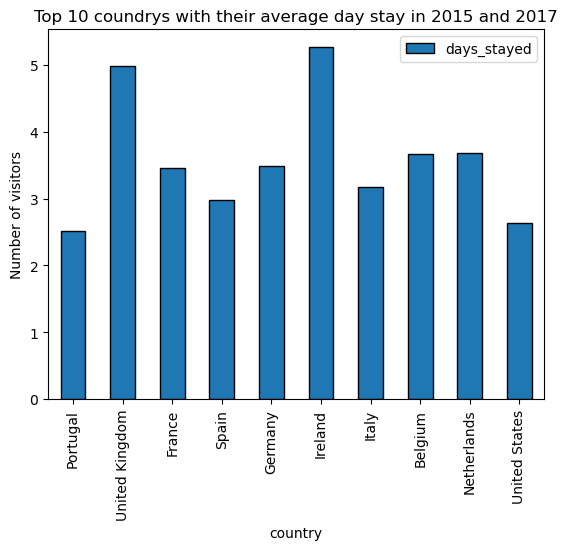

,country,days_stayed
69,Ireland,5.267794
156,United Kingdom,4.979434
104,Netherlands,3.679091
18,Belgium,3.668094
55,Germany,3.485582
50,France,3.456550
71,Italy,3.180025
138,Spain,2.976686
157,United States,2.639098
118,Portugal,2.508519


In [1641]:
top_2015_2017ak.plot.bar(x="country",y="days_stayed", title= "Top 10 coundrys with their average day stay in 2015 and 2017", ylabel= "Number of visitors", ec="black")

# Save the figure
plt.savefig("../2_Images/fig1_MS_top10_daystay_2015_2017", bbox_inches="tight")

plt.show()
top_2015_2017ak[["country","days_stayed"]].sort_values("days_stayed",ascending=False)

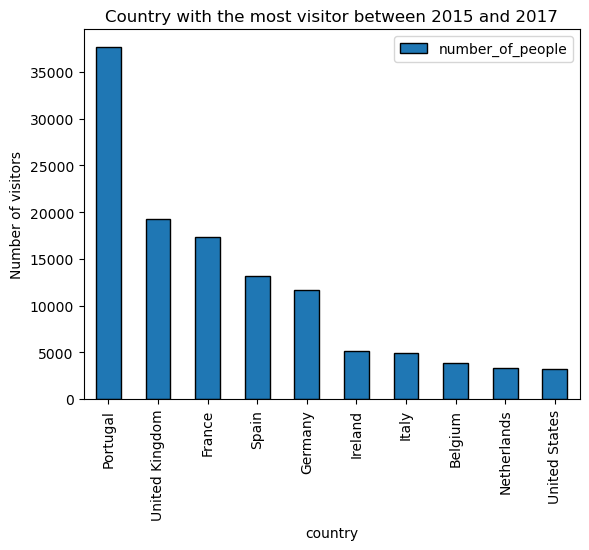

,country,number_of_people
118,Portugal,37670.0
156,United Kingdom,19258.0
50,France,17299.0
138,Spain,13213.0
55,Germany,11659.0
69,Ireland,5102.0
71,Italy,4894.0
18,Belgium,3855.0
104,Netherlands,3374.0
157,United States,3212.0


In [1642]:
top_2015_2017ak.plot.bar(x="country",y="number_of_people", title= "Country with the most visitor between 2015 and 2017", ylabel= "Number of visitors", ec="black")

# Save the figure
plt.savefig("../2_Images/fig1_MS_top10_2015_2017", bbox_inches="tight")

plt.show()
top_2015_2017ak[["country","number_of_people"]].sort_values("number_of_people",ascending=False)

# Plotting the information.

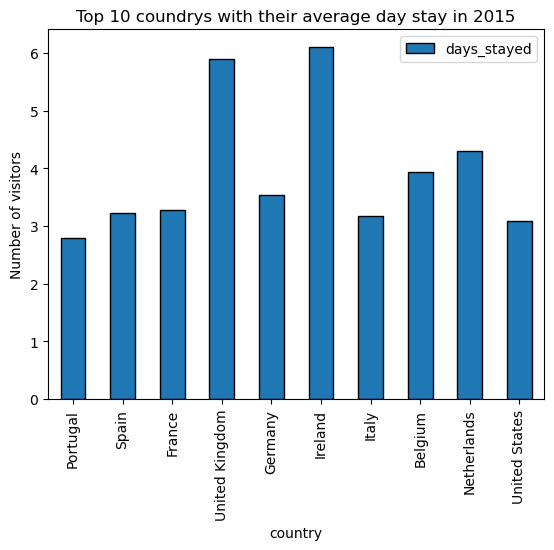

,country,days_stayed
39,Ireland,6.100239
92,United Kingdom,5.898469
57,Netherlands,4.295000
9,Belgium,3.927835
31,Germany,3.536398
29,France,3.268760
82,Spain,3.227778
41,Italy,3.175355
93,United States,3.083333
67,Portugal,2.795808


In [1643]:
top_10_2015.plot.bar(x="country",y="days_stayed", title= "Top 10 coundrys with their average day stay in 2015", ylabel= "Number of visitors", ec="black")

# Save the figure
plt.savefig("../2_Images/fig1_MS_top10_daystay_2015", bbox_inches="tight")

plt.show()

top_10_2015[["country","days_stayed"]].sort_values("days_stayed",ascending=False)

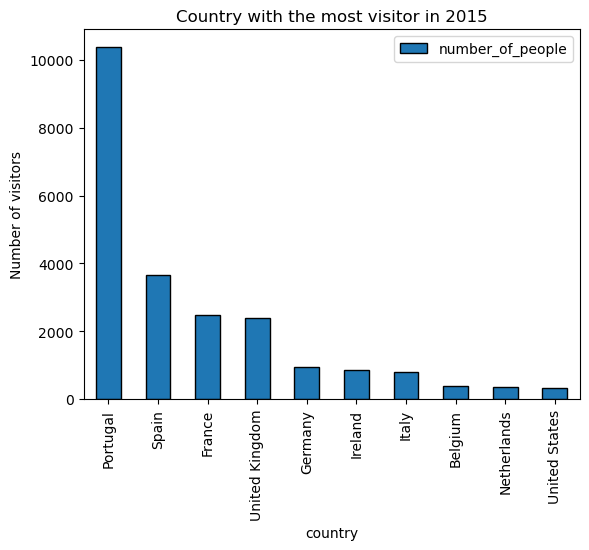

,country,number_of_people
67,Portugal,10378.0
82,Spain,3648.0
29,France,2481.0
92,United Kingdom,2382.0
31,Germany,941.0
39,Ireland,847.0
41,Italy,795.0
9,Belgium,378.0
57,Netherlands,369.0
93,United States,333.0


In [1644]:

top_10_2015.plot.bar(x="country",y="number_of_people", title= "Country with the most visitor in 2015",ylabel= "Number of visitors",ec="black")

# Save the figure
plt.savefig("../2_Images/fig1_MS_top10_2015", bbox_inches="tight")
plt.show()
top_10_2015[["country","number_of_people"]].sort_values("number_of_people",ascending=False)

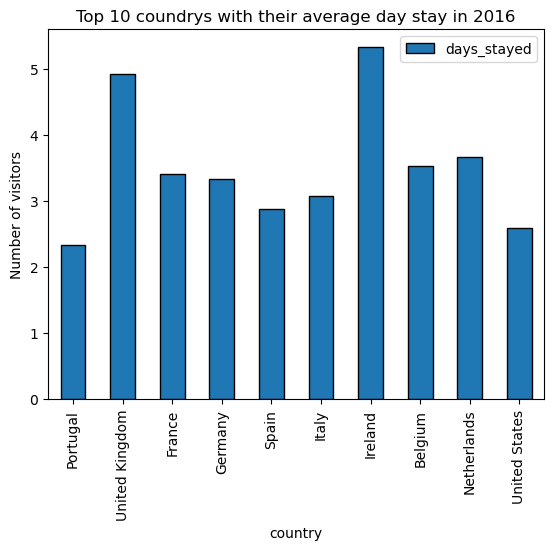

,country,days_stayed
58,Ireland,5.330769
130,United Kingdom,4.928400
86,Netherlands,3.665184
16,Belgium,3.526486
43,France,3.411309
47,Germany,3.335466
60,Italy,3.079582
115,Spain,2.880351
131,United States,2.593583
99,Portugal,2.340964


In [1645]:
top_10_2016.plot.bar(x="country",y="days_stayed", title= "Top 10 coundrys with their average day stay in 2016", ylabel= "Number of visitors", ec="black")

# Save the figure
plt.savefig("../2_Images/fig1_MS_top10_daystay_2016", bbox_inches="tight")

plt.show()
top_10_2016[["country","days_stayed"]].sort_values("days_stayed",ascending=False)

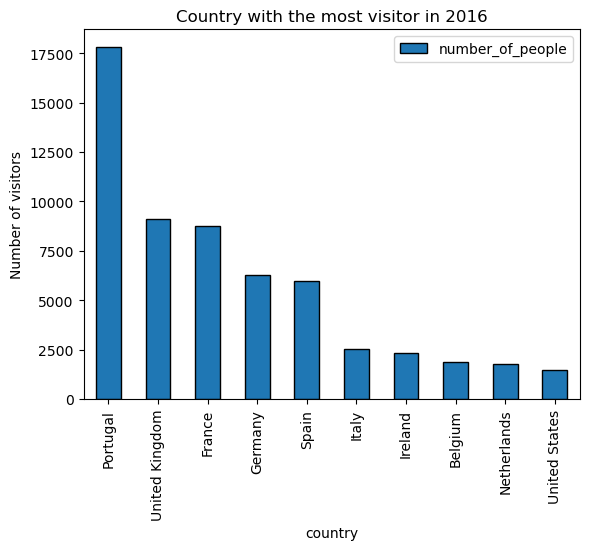

,country,number_of_people
99,Portugal,17810.0
130,United Kingdom,9129.0
43,France,8763.0
47,Germany,6300.0
115,Spain,5982.0
60,Italy,2531.0
58,Ireland,2329.0
16,Belgium,1901.0
86,Netherlands,1760.0
131,United States,1496.0


In [1646]:
top_10_2016.plot.bar(x="country",y="number_of_people",title= "Country with the most visitor in 2016",ylabel= "Number of visitors",ec="black")

# Save the figure
plt.savefig("../2_Images/fig1_MS_top10_2016", bbox_inches="tight")
plt.show()

top_10_2016[["country","number_of_people"]].sort_values("number_of_people",ascending=False)

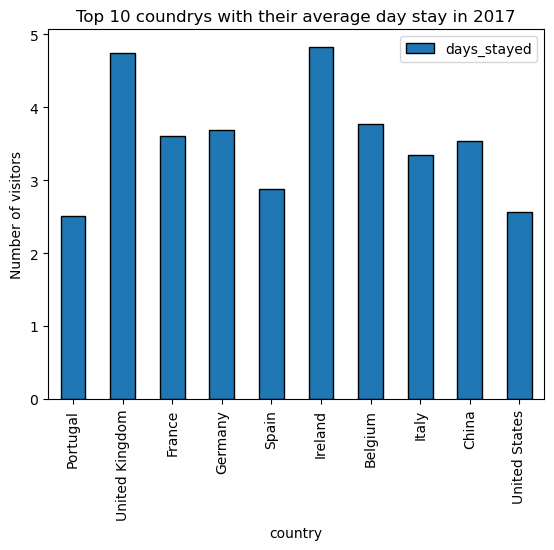

,country,days_stayed
54,Ireland,4.824948
126,United Kingdom,4.744162
15,Belgium,3.775701
43,Germany,3.691391
40,France,3.606934
23,China,3.543539
56,Italy,3.345502
111,Spain,2.874785
127,United States,2.570359
95,Portugal,2.511602


In [1647]:
top_10_2017.plot.bar(x="country",y="days_stayed", title= "Top 10 coundrys with their average day stay in 2017", ylabel= "Number of visitors", ec="black")

# Save the figure
plt.savefig("../2_Images/fig1_MS_top10_daystay_2017", bbox_inches="tight")

plt.show()
top_10_2017[["country","days_stayed"]].sort_values("days_stayed",ascending=False)

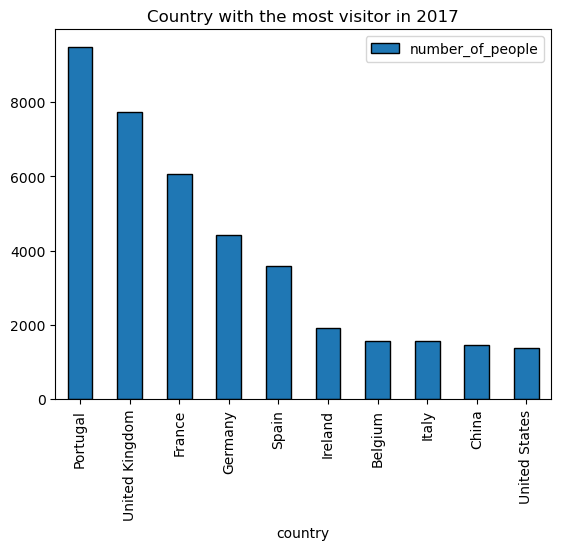

,country,number_of_people
95,Portugal,9482.0
126,United Kingdom,7747.0
40,France,6055.0
43,Germany,4418.0
111,Spain,3583.0
54,Ireland,1926.0
15,Belgium,1576.0
56,Italy,1568.0
23,China,1448.0
127,United States,1383.0


In [1648]:

top_10_2017.plot.bar(x="country",y="number_of_people",title= "Country with the most visitor in 2017",ec="black")
# Save the figure
plt.savefig("../2_Images/fig1_MS_top10_2017", bbox_inches="tight")
plt.show()
top_10_2017[["country","number_of_people"]].sort_values("number_of_people",ascending=False)


In [1649]:
# Define a function to create Linear Regression plots(code share by me from my assignment 6)
#linear regressive plot
def lrp(x,y,xl,yl):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    #regressive value
    regress_value= x * slope + intercept
    #line equation
    line = f"y= {round(slope,2)}x + {round(intercept,2)}\n The r value is {rvalue:,.2f}\n\n\n "
    print(f"The r  value is:{rvalue}")

    plt.scatter(x,y, color = "blue", alpha=.4, edgecolors="black")
    plt.plot(x, regress_value, color="red")
    plt.title(f"Comparing {xl} and  {yl}" )
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title
    plt.annotate(line,(x.min(),y.min()),fontsize=15, color="red", weight= "bold")
    plt.savefig(f"../2_Images/fig1_MS_{xl}_and_{yl}comparison", bbox_inches="tight")
    plt.show()




The r  value is:0.03329016954384072


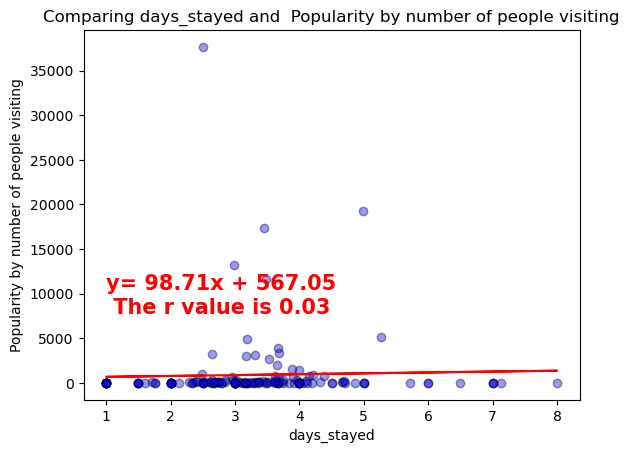

In [1650]:
x=data_summary_ak_agg["days_stayed"]
y= data_summary_ak_agg["number_of_people"]

lrp(x,y, "days_stayed","Popularity by number of people visiting")

The r  value is:-0.23509391871053237


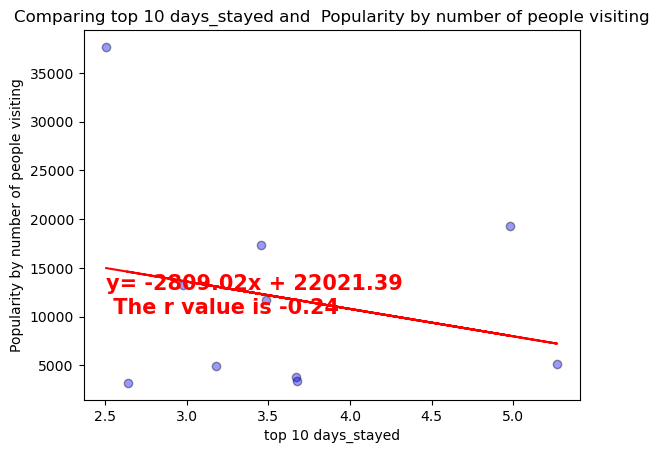

In [1651]:
x=top_2015_2017ak["days_stayed"]
y= top_2015_2017ak["number_of_people"]

lrp(x,y, "top 10 days_stayed","Popularity by number of people visiting")

The r  value is:0.11172144876825278


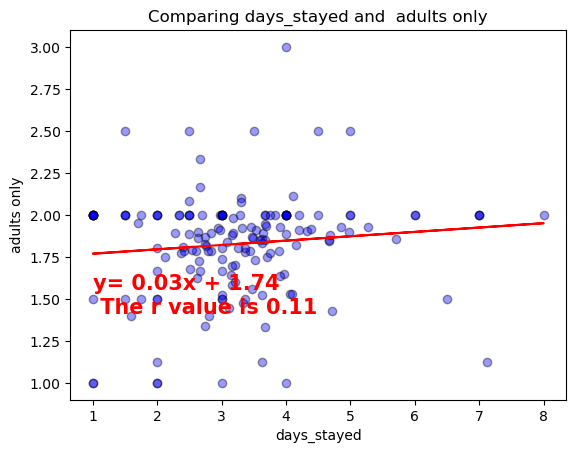

In [1652]:
x=data_summary_ak_agg["days_stayed"]
y= data_summary_ak_agg["adults"]

lrp(x,y, "days_stayed","adults only")

The r  value is:0.5019945367421561


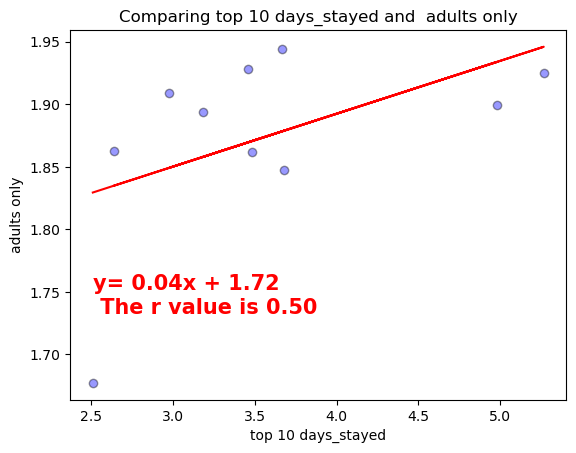

In [1653]:
x=top_2015_2017ak["days_stayed"]
y= top_2015_2017ak["adults"]

lrp(x,y, "top 10 days_stayed","adults only")

In [1654]:
top_2015_2017ak

,country,number_of_people,averate_rate,days_stayed,adults,kids,average_rate
118,Portugal,37670.0,90.342738,2.508519,1.677329,0.110436,90.342738
156,United Kingdom,19258.0,90.467804,4.979434,1.899545,0.090740,90.467804
50,France,17299.0,105.750599,3.456550,1.928192,0.111543,105.750599
138,Spain,13213.0,110.304402,2.976686,1.908778,0.158661,110.304402
55,Germany,11659.0,101.259214,3.485582,1.861427,0.059647,101.259214
69,Ireland,5102.0,94.690995,5.267794,1.924892,0.081400,94.690995
71,Italy,4894.0,110.760123,3.180025,1.893958,0.117550,110.760123
18,Belgium,3855.0,111.477709,3.668094,1.943790,0.119914,111.477709
104,Netherlands,3374.0,105.010518,3.679091,1.847408,0.117647,105.010518
157,United States,3212.0,118.976667,2.639098,1.862155,0.150376,118.976667


The r  value is:0.0010082968815048623


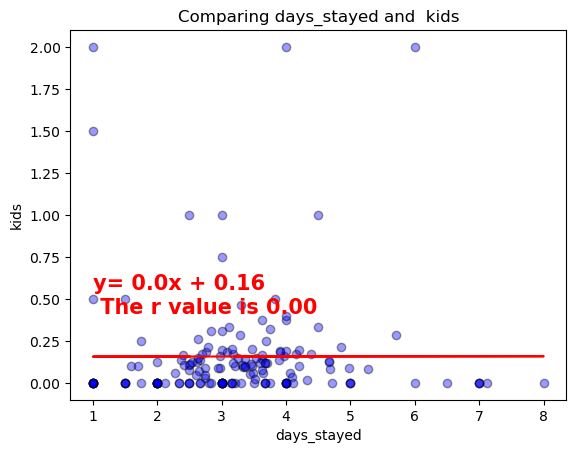

In [1655]:
x=data_summary_ak_agg["days_stayed"]
y= data_summary_ak_agg["kids"]

lrp(x,y, "days_stayed","kids")

The r  value is:-0.5782918120315417


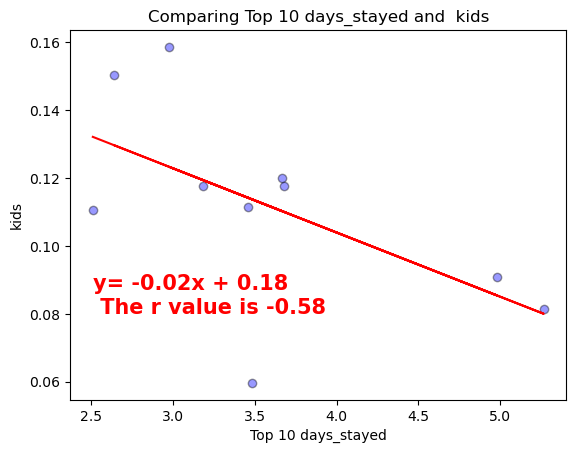

In [1656]:
x=top_2015_2017ak["days_stayed"]
y= top_2015_2017ak["kids"]

lrp(x,y, "Top 10 days_stayed","kids")

The r  value is:-0.004625587872097222


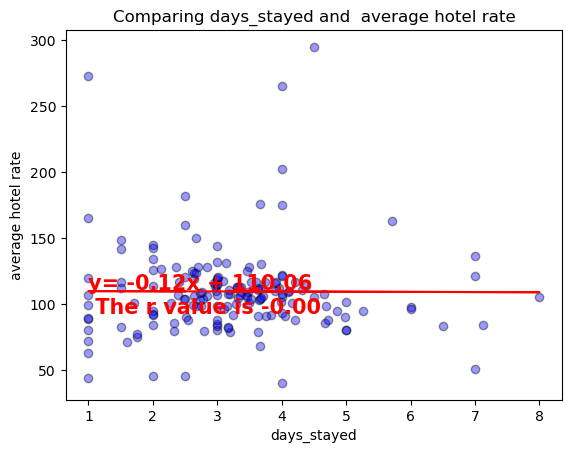

In [1657]:
x=data_summary_ak_agg["days_stayed"]
y= data_summary_ak_agg["average_rate"]

lrp(x,y, "days_stayed","average hotel rate")

The r  value is:-0.5066964598938479


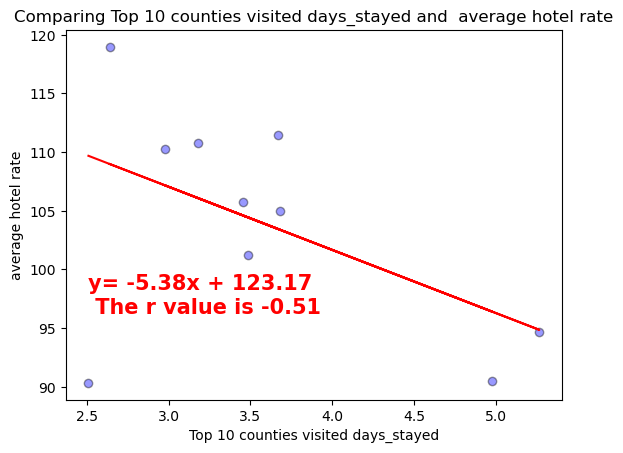

In [1658]:
x=top_2015_2017ak["days_stayed"]
y= top_2015_2017ak["average_rate"]

lrp(x,y, "Top 10 counties visited days_stayed","average hotel rate")

# Analysis base on days stay in country that was visited.
---
---

- Key metrics:
    - Number of people that arrive and check in and out from their hotels that was book
    - umber of days a person or persons staying their hotel.
    - Number of adults traveling without kids
    - Nmuber of adults traveling with kids
 ---

- observation from the bar graph.
    - Portugal was the most visited country overall between 2015 and 2017, as well as the top country in each individual year.
    - Although Portugal was visited by more people, it had the lowest average number of days people stay(2.51 days) between 2015 and 2017, of the top 10 visited countries, as well as the lowest average in each individual year.
    - Ireland had the highest average number of days people stay(5.27 days) between 2015 and 2017, as well as the top country in each individual year.
    - Ireland rank in the middle of the top 10 most visited countries.

---

- Analysis on the Pearson correlation coefficient
    - The linear correlation between the days stay in a country and the polularity of visitor overall was 0. The linear correlation for the top 10 countries for the same factors was very weak with a negative r value of -.23. 
    - The linear correlation between the days stay in a country and adult traveling without kids overall was 0.11(very weak). The linear correlation for the top 10 countries for the same factors was  moderate with a posite r value of .50.

    This indicates that adults traveling with out kids in that top 10 country will stay longer.

    -  The linear correlation between the days stay in a country and adult traveling with kids overall was 0.001(no correlation). The linear correlation for the top 10 countries for the same factors was more significant with a negative r value of .58(on the high side of moderate).

    This indicates that adults traveling with kids in that top 10 country will stay few days in a visiting country.

    - The linear correlation between the days stay in a country and the average hotel rate overall was 0.004(no correlation). The linear correlation for the top 10 countries for the same factors was more significant with a negative r value of -.51(on the high side of moderate).

    This indicates that travelers to the top 10 country will stay few days if the hotel rates was higher.












    